In [28]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
print(tf.__version__)

2.9.2


In [3]:
!wget --no-check-certificate \
  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2022-11-06 13:16:40--  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip
Resolving dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)... 205.185.216.42, 205.185.216.10
Connecting to dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)|205.185.216.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M   282MB/s    in 0.2s    

2022-11-06 13:16:40 (282 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [4]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [5]:
os.listdir('/tmp/images/train')

['messy', 'clean']

In [6]:
os.listdir('/tmp/images/val')

['messy', 'clean']

In [7]:
# membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join(train_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data training
train_messy_dir = os.path.join(train_dir, 'messy')

# membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir = os.path.join(validation_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data validasi
validation_messy_dir = os.path.join(validation_dir, 'messy')

In [8]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [9]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [32]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [33]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [34]:
cb= keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=50,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # erapa batch yang akan dieksekusi pada setiap epoch
      verbose=2,
      callbacks = [cb])

Epoch 1/50
25/25 - 2s - loss: 0.8843 - accuracy: 0.4800 - val_loss: 0.6905 - val_accuracy: 0.5000 - 2s/epoch - 74ms/step
Epoch 2/50
25/25 - 1s - loss: 0.6995 - accuracy: 0.5600 - val_loss: 0.6713 - val_accuracy: 0.5000 - 1s/epoch - 41ms/step
Epoch 3/50
25/25 - 1s - loss: 0.6779 - accuracy: 0.5900 - val_loss: 0.6662 - val_accuracy: 0.7500 - 1s/epoch - 40ms/step
Epoch 4/50
25/25 - 1s - loss: 0.6630 - accuracy: 0.5700 - val_loss: 0.6310 - val_accuracy: 0.9000 - 1s/epoch - 41ms/step
Epoch 5/50
25/25 - 1s - loss: 0.6437 - accuracy: 0.7400 - val_loss: 0.6183 - val_accuracy: 0.8000 - 1s/epoch - 40ms/step
Epoch 6/50
25/25 - 1s - loss: 0.6573 - accuracy: 0.6800 - val_loss: 0.5759 - val_accuracy: 0.8500 - 1s/epoch - 41ms/step
Epoch 7/50
25/25 - 1s - loss: 0.5864 - accuracy: 0.7400 - val_loss: 0.5734 - val_accuracy: 0.7500 - 1s/epoch - 41ms/step
Epoch 8/50
25/25 - 1s - loss: 0.5677 - accuracy: 0.7200 - val_loss: 0.5356 - val_accuracy: 0.8500 - 1s/epoch - 40ms/step
Epoch 9/50
25/25 - 1s - loss: 0.

Best Validation Loss: 0.4422
Best Validation Accuracy: 0.9000


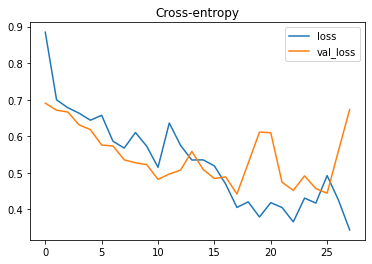

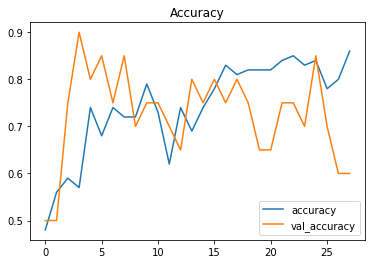

In [35]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))

Saving tes1.jpg to tes1 (4).jpg
1/1 [==============================] - 0s 146ms/step
tes1.jpg
messy


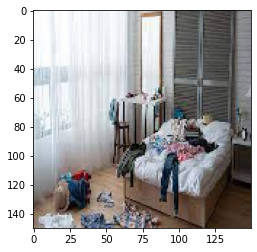

In [36]:
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = tf.keras.preprocessing.image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = tf.keras.preprocessing.image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes==0:
    print('clean')
  else:
    print('messy')